Notes:
```
tf.keras.utils.plot_model(gan_model, to_file='msc-experiment1-ganmodel.png', show_shapes=True)
```

In [1]:
import numpy as np
import tensorflow as tf
import h5py

import itertools
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from scipy.signal import spectrogram, stft, istft

from sklearn.metrics import confusion_matrix

In [17]:
def plot_seismograms(do, label, file_path=None):
    do = np.rot90(do, k=1, axes=(0, 1))
    do = do.reshape(3, 6000)
    d0 = pd.DataFrame(data=do[0][:SAMPLES])
    d1 = pd.DataFrame(data=do[1][:SAMPLES])
    d2 = pd.DataFrame(data=do[2][:SAMPLES])
    
    plt.rc('font', size=11)
    plt.rc('axes', titlesize=16)

    fig = plt.figure(figsize=(8, 5), dpi=227)
    ax1 = plt.subplot2grid((3, 1), (0, 0), colspan=1)
    ax2 = plt.subplot2grid((3, 1), (1, 0), colspan=1)
    ax3 = plt.subplot2grid((3, 1), (2, 0), colspan=1)

    plt.subplots_adjust(hspace=1, wspace=1)

    sns.lineplot(data=d0, ax=ax1, linewidth=1, legend=None)
    sns.lineplot(data=d1, ax=ax2, linewidth=1, legend=None)
    sns.lineplot(data=d2, ax=ax3, linewidth=1, legend=None)

    ax1.set_title("Vertical component waveform")
    ax1.set(xlabel="Samples", ylabel="Amplitude counts")
    ax1.locator_params(nbins=6, axis="y")

    ax2.set_title("North component waveform")
    ax2.set(xlabel="Samples", ylabel="Amplitude counts")
    ax2.locator_params(nbins=6, axis="y")

    ax3.set_title("East component waveform")
    ax3.set(xlabel="Samples", ylabel="Amplitude counts")
    ax3.locator_params(nbins=6, axis="y")

    plt.suptitle(label, fontsize=14)

    if file_path != None:
        plt.savefig(file_path)
        plt.close(fig)

In [18]:
def plot_all(do, label, file_path=None):
    do = np.rot90(do, k=1, axes=(0, 1))
    do = do.reshape(3, 6000)
    d0 = pd.DataFrame(data=do[0][:SAMPLES])
    d1 = pd.DataFrame(data=do[1][:SAMPLES])
    d2 = pd.DataFrame(data=do[2][:SAMPLES])
    
    plt.rc('font', size=11)
    plt.rc('axes', titlesize=16)

    fig = plt.figure(figsize=(16, 10), dpi=227)
    ax1 = plt.subplot2grid((5, 6), (0, 0), colspan=3)
    ax2 = plt.subplot2grid((5, 6), (1, 0), colspan=3)
    ax3 = plt.subplot2grid((5, 6), (2, 0), colspan=3)
    ax4 = plt.subplot2grid((5, 6), (0, 3), colspan=3)
    ax5 = plt.subplot2grid((5, 6), (1, 3), colspan=3)
    ax6 = plt.subplot2grid((5, 6), (2, 3), colspan=3)
    ax7 = plt.subplot2grid((5, 6), (3, 0), colspan=2, rowspan=2)
    ax8 = plt.subplot2grid((5, 6), (3, 2), colspan=2, rowspan=2)
    ax9 = plt.subplot2grid((5, 6), (3, 4), colspan=2, rowspan=2)

    plt.subplots_adjust(hspace=1, wspace=1)

    sns.lineplot(data=d0, ax=ax1, linewidth=1, legend=None)
    sns.lineplot(data=d1, ax=ax2, linewidth=1, legend=None)
    sns.lineplot(data=d2, ax=ax3, linewidth=1, legend=None)

    ax1.set_title("Vertical component waveform")
    ax1.set(xlabel="Samples", ylabel="Amplitude counts")
    ax1.locator_params(nbins=6, axis="y")

    ax2.set_title("North component waveform")
    ax2.set(xlabel="Samples", ylabel="Amplitude counts")
    ax2.locator_params(nbins=6, axis="y")

    ax3.set_title("East component waveform")
    ax3.set(xlabel="Samples", ylabel="Amplitude counts")
    ax3.locator_params(nbins=6, axis="y")

    f_0, t_0, Sxx_0 = spectrogram(x=do[0], fs=FS)
    f_1, t_1, Sxx_1 = spectrogram(x=do[1], fs=FS)
    f_2, t_2, Sxx_2 = spectrogram(x=do[2], fs=FS)

    ax4.clear()
    ax4.set_title("Vertical component spectrogram")
    _ax4 = ax4.pcolormesh(t_0, f_0, Sxx_0, shading="gouraud")
    ax4.set(xlabel="Time [sec]", ylabel="Frequency [Hz]")
    fig.colorbar(_ax4, ax=ax4)

    ax5.clear()
    ax5.set_title("North component spectrogram")
    _ax5 = ax5.pcolormesh(t_1, f_1, Sxx_1, shading="gouraud")
    ax5.set(xlabel="Time [sec]", ylabel="Frequency [Hz]")
    fig.colorbar(_ax5, ax=ax5)

    ax6.clear()
    ax6.set_title("East component spectrogram")
    _ax6 = ax6.pcolormesh(t_2, f_2, Sxx_2, shading="gouraud")
    ax6.set(xlabel="Time [sec]", ylabel="Frequency [Hz]")
    fig.colorbar(_ax6, ax=ax6)

    f_sftt_0, t_sftt_0, Zxx_0 = stft(do[0], window="hanning", fs=FS, nperseg=NPERSEG)
    f_sftt_1, t_sftt_1, Zxx_1 = stft(do[1], window="hanning", fs=FS, nperseg=NPERSEG)
    f_sftt_2, t_sftt_2, Zxx_2 = stft(do[2], window="hanning", fs=FS, nperseg=NPERSEG)

    ticks = np.arange(STFT_SIZE)

    ax7.clear()
    ax7.set_title("Vertical component STFT")
    _ax7 = ax7.pcolormesh(ticks, ticks, np.abs(Zxx_0), shading="auto")
    fig.colorbar(_ax7, ax=ax7)

    ax8.clear()
    ax8.set_title("North component STFT")
    _ax8 = ax8.pcolormesh(ticks, ticks, np.abs(Zxx_1), shading="auto")
    fig.colorbar(_ax8, ax=ax8)

    ax9.clear()
    ax9.set_title("East component STFT")
    _ax9 = ax9.pcolormesh(ticks, ticks, np.abs(Zxx_2), shading="auto")
    fig.colorbar(_ax9, ax=ax9)

    plt.suptitle(label, fontsize=14)

    if file_path != None:
        plt.savefig(file_path)
        plt.close(fig)

In [4]:
# Define the constants
FS = 100
NPERSEG = 155
SAMPLES = 6000
STFT_SIZE = 78
N_SAMPLES = 10000
KEYS_VALID = None
Y_VALID = None
X_VALID = None

In [5]:
with h5py.File("data/stead_test_raw.hdf5", "r") as f:
    KEYS_VALID = f["keys"][:N_SAMPLES]
    Y_VALID = f["labels"][:N_SAMPLES]
    X_VALID = f["data"][:N_SAMPLES]

In [7]:
disc = tf.keras.models.load_model("out1/desc-50")
pred = disc.predict(X_VALID)

2022-01-24 16:38:10.619400: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-24 16:38:10.625595: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-24 16:38:10.625914: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-24 16:38:10.626354: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

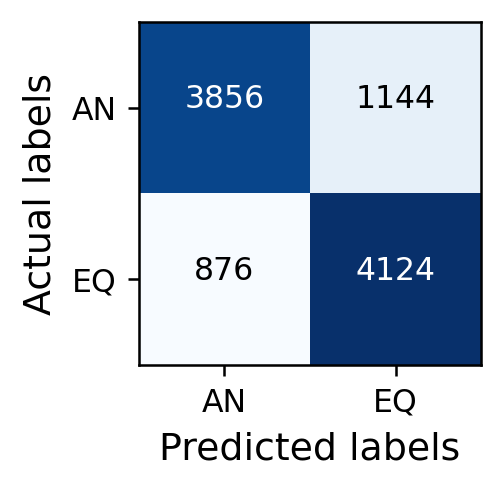

In [8]:
conf_matrix = confusion_matrix(y_true=Y_VALID, y_pred=np.round(abs(pred)))
nr_rows = conf_matrix.shape[0]
nr_cols = conf_matrix.shape[1]

plt.figure(figsize=(2, 2), dpi=227)
plt.imshow(conf_matrix, cmap=plt.cm.Blues)

# plt.title('Confusion Matrix', fontsize=16)
plt.ylabel('Actual labels', fontsize=12)
plt.xlabel('Predicted labels', fontsize=12)

tick_marks = np.arange(2)
plt.yticks(tick_marks, ["AN", "EQ"])
plt.xticks(tick_marks, ["AN", "EQ"])

for i, j in itertools.product(range(nr_rows), range(nr_cols)):
    plt.text(j, i, conf_matrix[i, j], horizontalalignment='center',
    color='white' if conf_matrix[i, j] > conf_matrix.max()/2 else 'black')

plt.show()

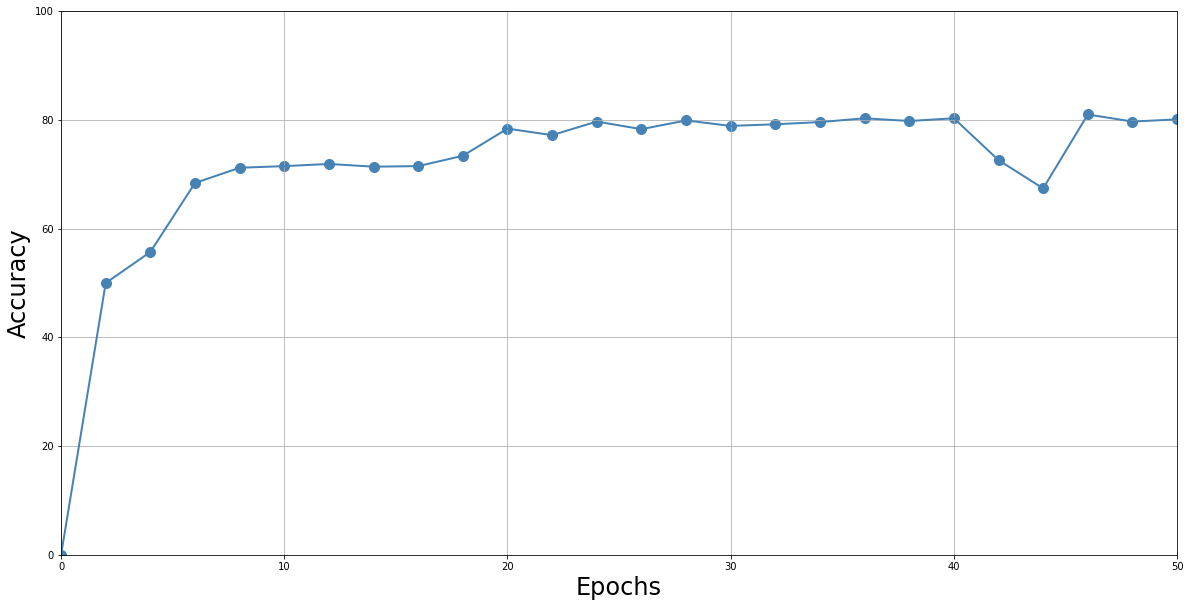

In [9]:
plt.figure(figsize=[20, 10])

plt.xlim([0, 50])
plt.ylim([0, 100])

# plt.title('Discriminator accuracy', fontsize=17)
plt.xlabel('Epochs', fontsize=24)
plt.ylabel('Accuracy', fontsize=24)

# 2) X Axis Data: create a list from 0 to n + 1
iteration_list = [x for x in range(51) if x%2==0]
vals = [0, 50, 55.7, 68.4, 71.2, 71.5, 71.9, 71.4, 71.5, 73.4, 78.4, 77.2, 79.7, 78.3, 79.9, 78.9, 79.2, 79.6, 80.3, 79.8, 80.3, 72.6, 67.4, 81.0, 79.7, 80.1]

# Plotting low learning rate
plt.plot(iteration_list, np.array(vals), color='steelblue', linewidth=2)
plt.scatter(iteration_list, np.array(vals), color="steelblue", s=100)

# # Plotting mid learning rate
# plt.plot(iteration_list, g(mid_values), color='steelblue', linewidth=5)
# plt.scatter(iteration_list, g(mid_values), color="steelblue", s=80)

# # Plotting high learning rate
# plt.plot(iteration_list, g(high_values), color='hotpink', linewidth=5)
# plt.scatter(iteration_list, g(high_values), color="hotpink", s=80)

# # Plotting insane learning rate
# plt.plot(iteration_list, g(insane_values), color='red', linewidth=5)
# plt.scatter(iteration_list, g(insane_values), color="red", s=80)
plt.grid()

In [10]:
idx = 192
print(f"Predicted accuracy: {pred[idx]}")
print(f"Real class: {Y_VALID[idx]}")

Predicted accuracy: [0.31319168]
Real class: 1


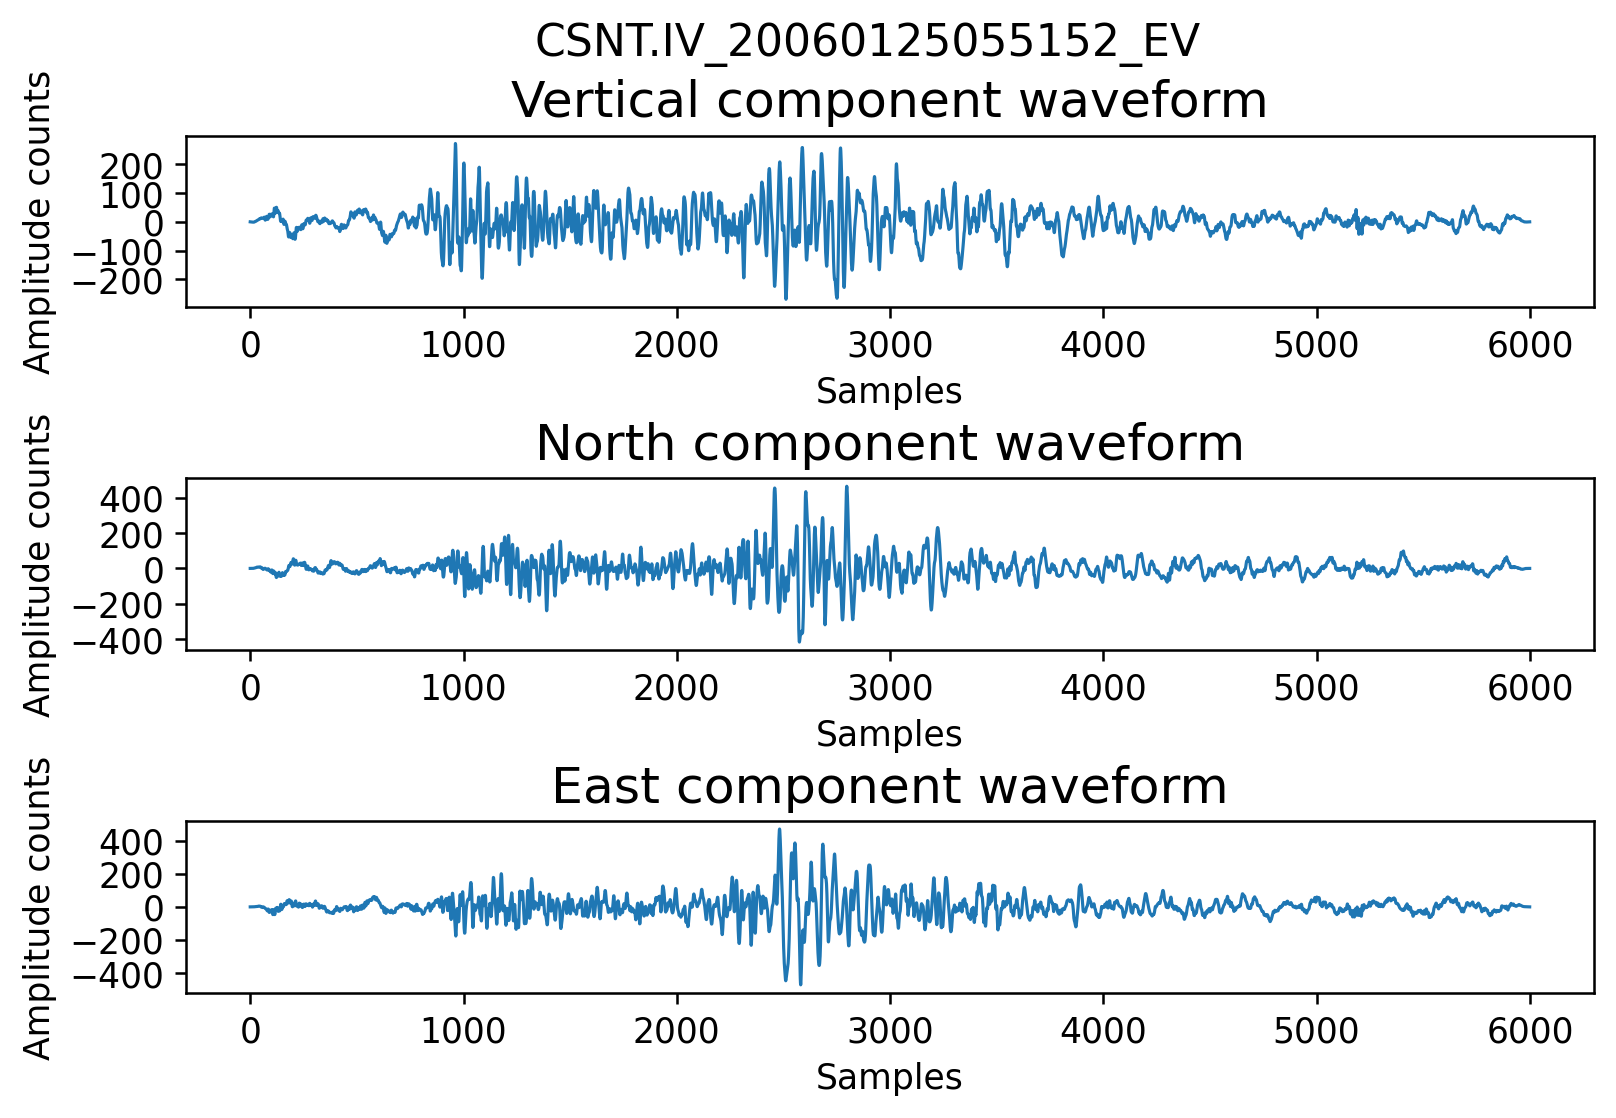

In [19]:
plot_seismograms(X_VALID[idx], KEYS_VALID[idx].decode("utf-8"))

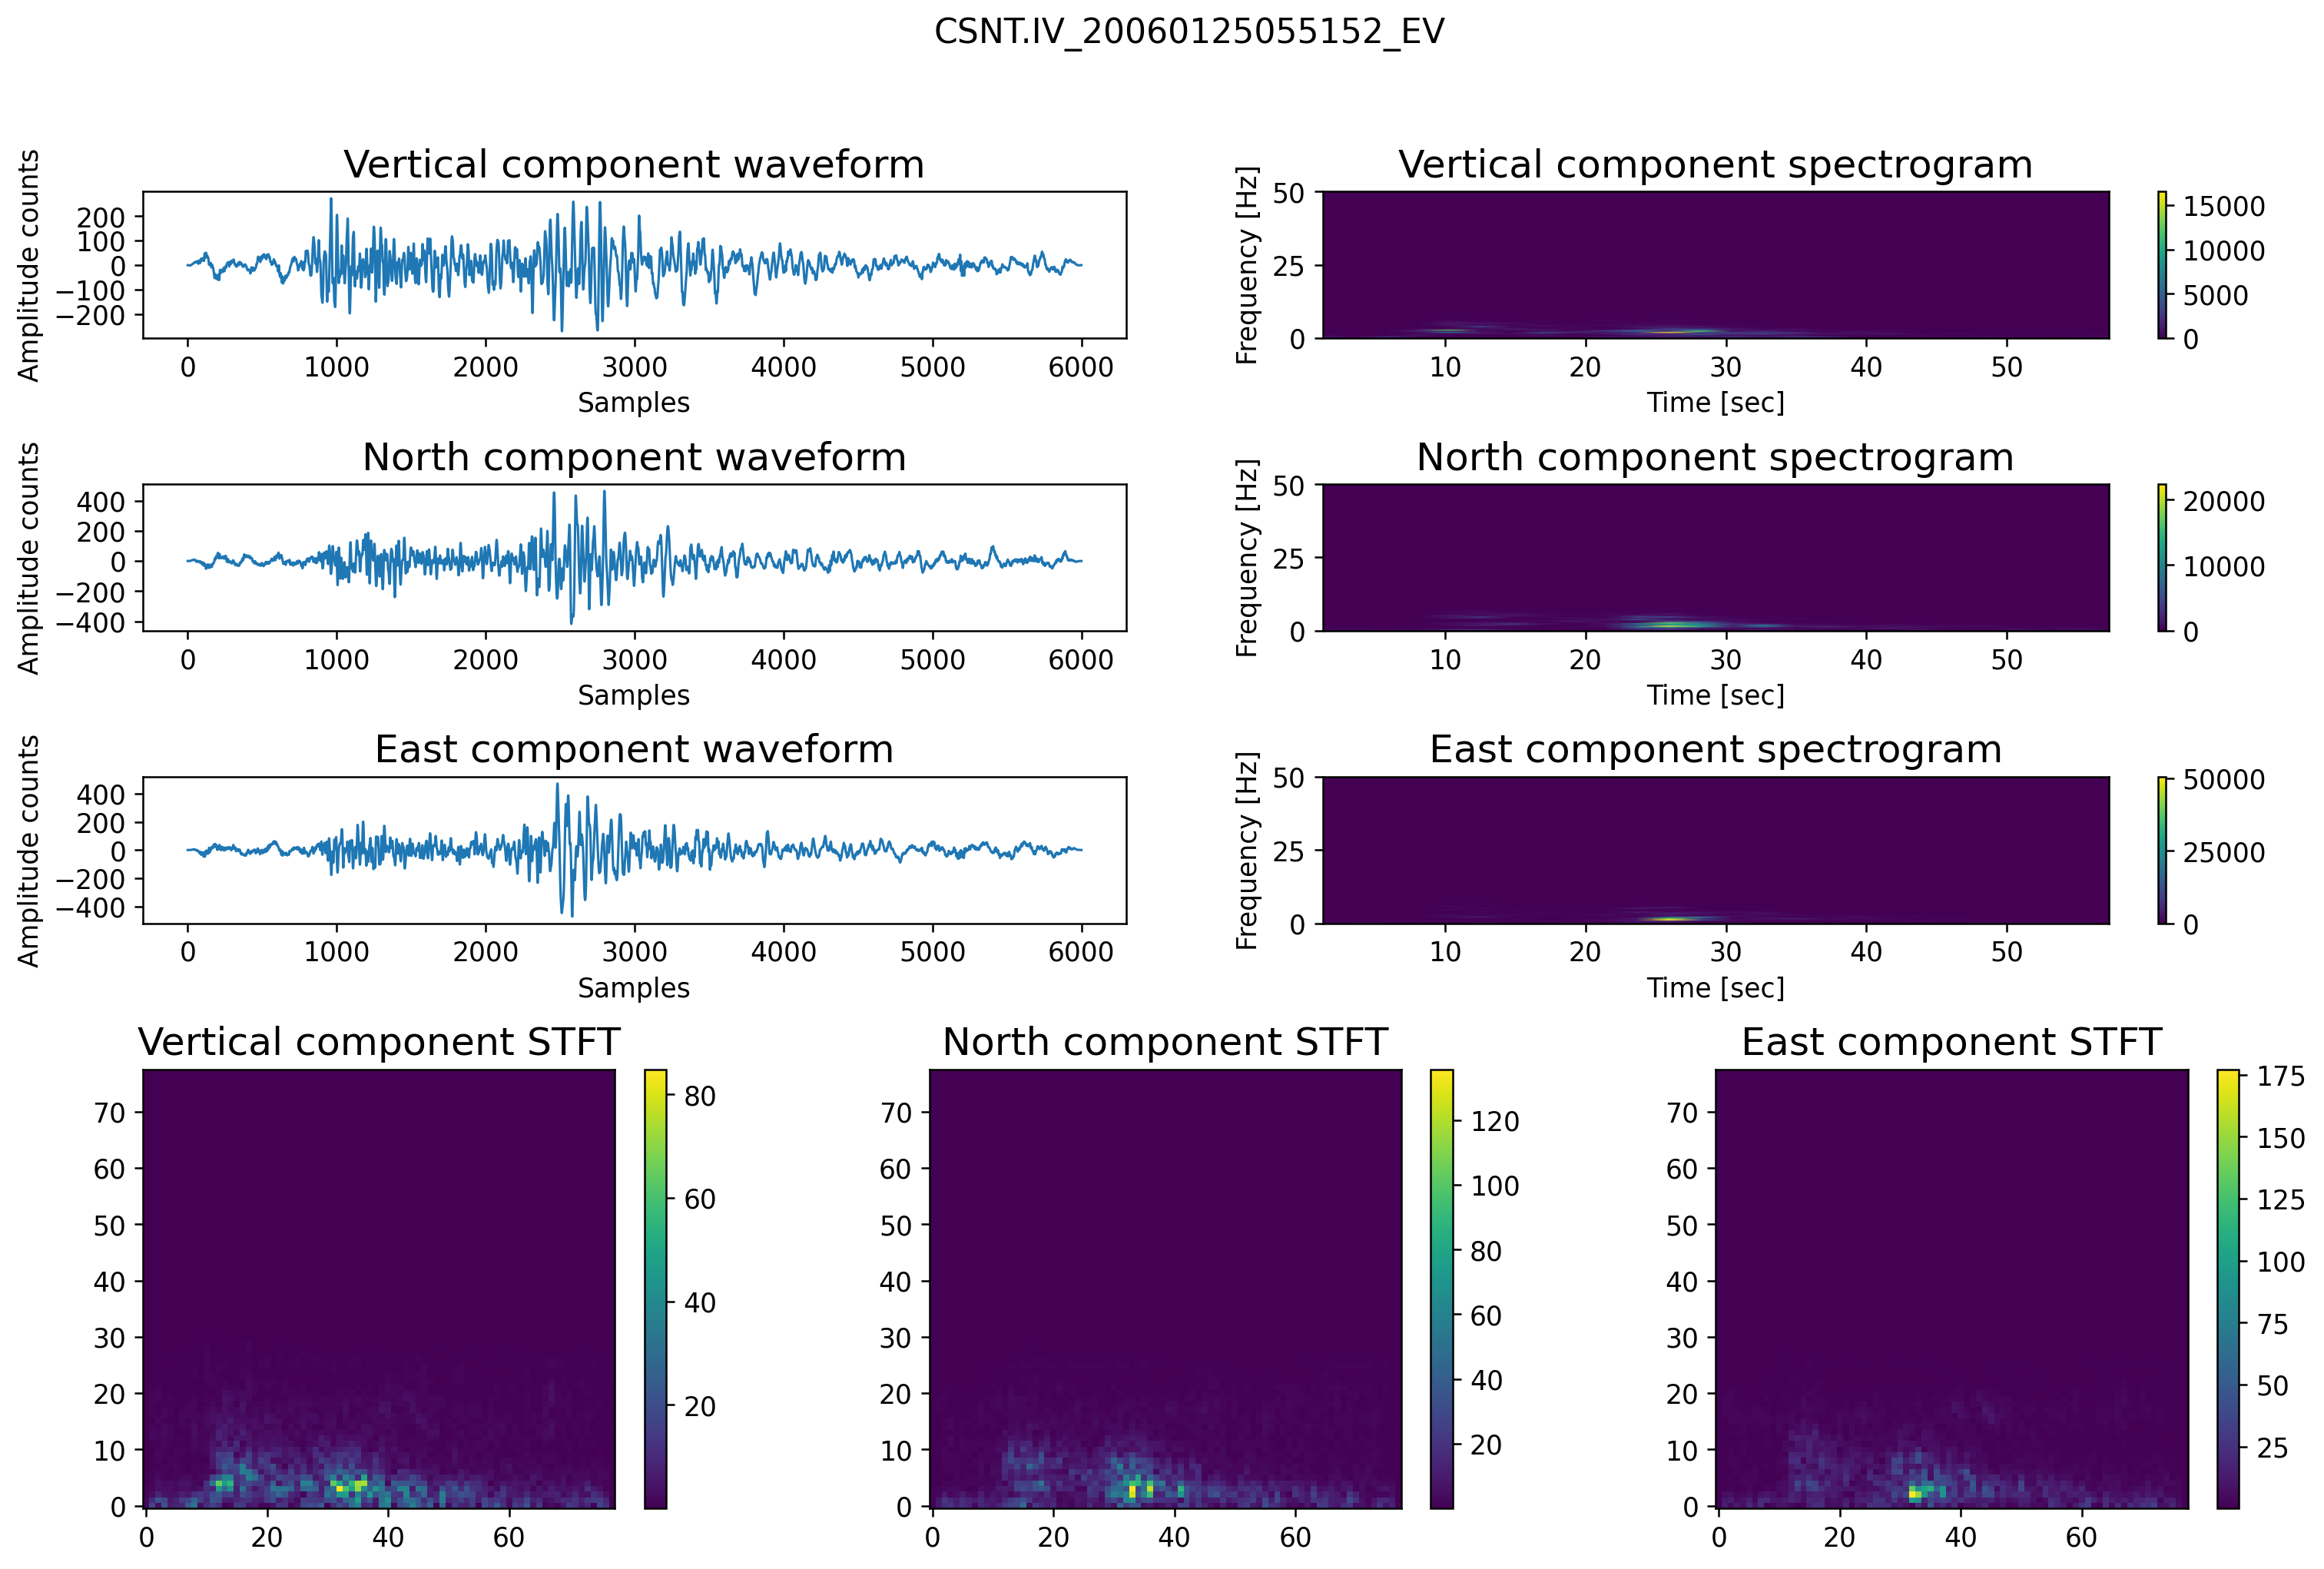

In [20]:
plot_all(X_VALID[idx], KEYS_VALID[idx].decode("utf-8"))